In [1]:
import matplotlib.pyplot as plt
import xarray as xr

import opensense_data_downloader_and_transformer as oddt

# Single E-band CML data from Czech Republic
source: https://zenodo.org/record/5013463/files/Dataset_1.0.0.zip

Note that this dataset contains much more than just the CML data, but for now we only parse the CML data.

In [2]:
oddt.download_fencl_2021_Eband_data(local_path='fencl_2021_Eband_data', print_output=True);

File already exists at desired location fencl_2021_Eband_data/Dataset_1.0.0.zip
Not downloading!


In [3]:
ds = oddt.tranform_fencl_2021_Eband_data('fencl_2021_Eband_data/Dataset_1.0.0.zip')
ds

<xarray.Dataset>
Dimensions:           (sublink_id: 2, time: 59328)
Coordinates:
  * time              (time) datetime64[ns] 2019-03-10 ... 2019-10-01T23:55:00
    cml_id            <U16 'cz_example_cml_1'
    length            float64 4.866
  * sublink_id        (sublink_id) <U2 'ab' 'ba'
    site_a_longitude  float64 14.53
    site_b_longitude  float64 14.53
    site_a_latitude   float64 50.03
    site_b_latitude   float64 50.03
Data variables:
    trsl              (sublink_id, time) float64 50.3 50.3 50.2 ... 50.2 50.3
    frequency         (sublink_id) float64 73.5 83.5

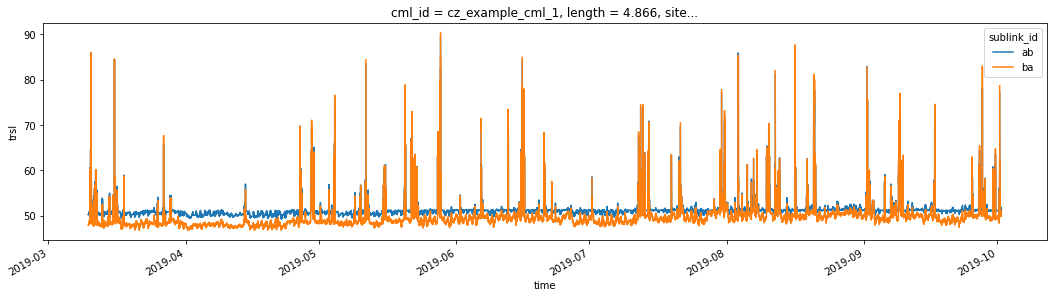

In [4]:
ds.trsl.plot.line(x='time', figsize=(18,4));

# Example data from German CMLs with fake coordinates
Provided as example data in `pycomlink`

In [5]:
oddt.download_data_file(
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
    local_path='pycomlink_example_data',
    print_output=True,
)

File already exists at desired location pycomlink_example_data/example_cml_data.nc
Not downloading!


In [6]:
ds = xr.open_dataset('pycomlink_example_data/example_cml_data.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...

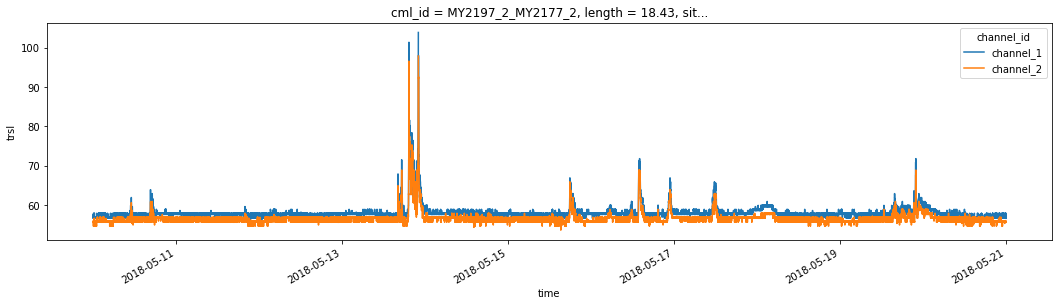

In [7]:
# Set defaul fill values to NaN
ds['tsl'] = ds.tsl.where(ds.tsl != 255.0)
ds['rsl'] = ds.rsl.where(ds.rsl != -99.9)
# Calculate TRSL
ds['trsl'] = ds.tsl - ds.rsl
# Plot
ds.isel(cml_id=42).trsl.plot.line(x='time', figsize=(18,4));